In [15]:
import numpy as np
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from skimage import color

(1024, 1024, 3)


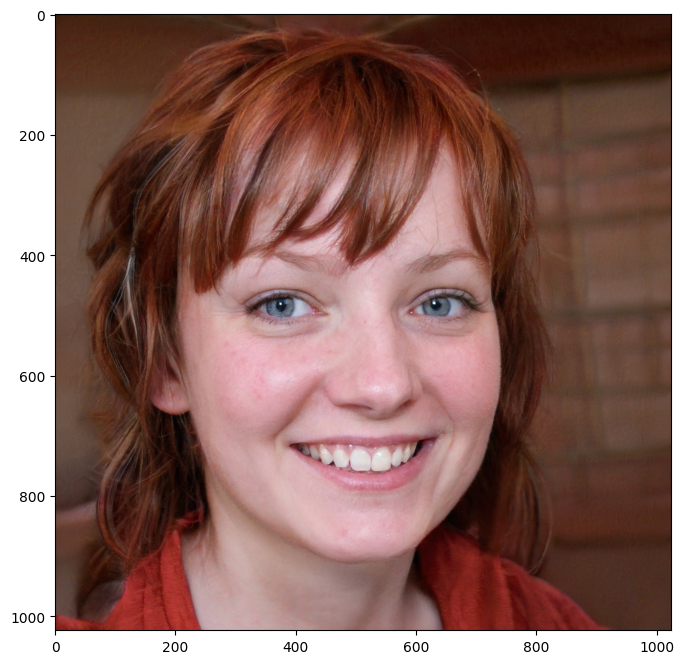

In [16]:
image_raw = imread("./image.jpeg")
print(image_raw.shape)

plt.figure(figsize=[12,8])
plt.imshow(image_raw)

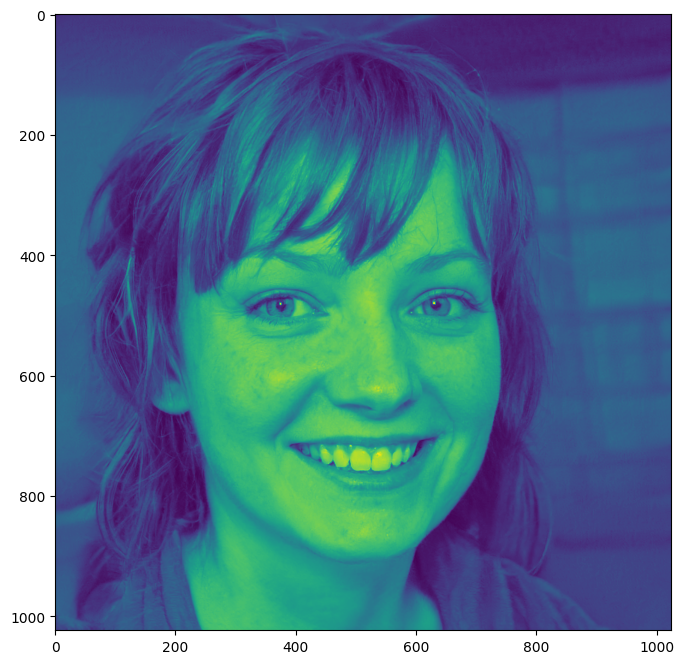

In [17]:
img = color.rgb2gray(imread('image.jpeg'))
plt.figure(figsize=[12,8])
plt.imshow(img)


k for 98% variance: 36


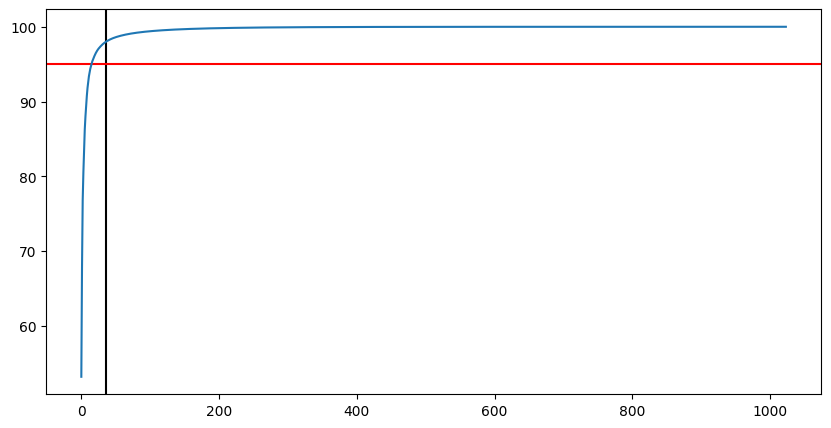

In [18]:
pca = PCA()
pca.fit(img)

variance = np.cumsum(pca.explained_variance_ratio_)*100

# Calculating the number of components needed to preserve 98% of the data
k = np.argmax(variance>98)
print("k for 98% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.axvline(x=k, color="k")
plt.axhline(y=95, color="r")
ax = plt.plot(variance)

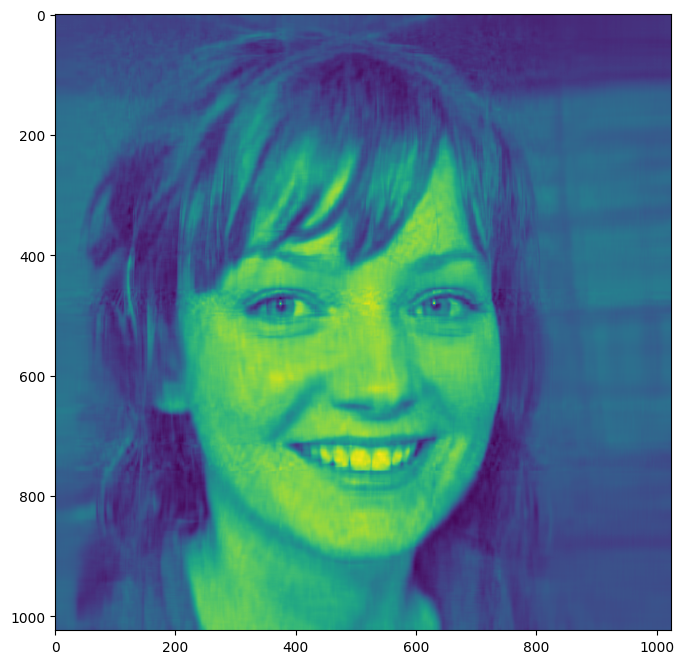

In [19]:
ipca = IncrementalPCA(n_components=k)
image_compressed = ipca.inverse_transform(ipca.fit_transform(img))

imsave('./pca_ghyb.jpeg', image_compressed)

# Plotting the compressed image
plt.figure(figsize=[12,8])
plt.imshow(image_compressed)

In [20]:
import os
print(os.stat('./image.jpeg').st_size/1024)
print(os.stat('./pca_ghyb.jpeg').st_size/1024)

578.2294921875
64.86328125
